<a href="https://colab.research.google.com/github/hyulianton/JaringanSyarafTiruan/blob/main/jst_Perceptron_gerbang_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Library dan Definisi Kelas Perceptron
Sel ini berisi kode untuk mengimpor library yang diperlukan dan mendefinisikan ulang kelas Perceptron. Modifikasi utama ada pada metode fit() untuk mendeteksi kapan model berhenti belajar.

In [4]:
# Sel 1: Import library dan definisi kelas Perceptron
import numpy as np
# Mengimpor NumPy untuk operasi array, fundamental untuk komputasi numerik.
import matplotlib.pyplot as plt
# Mengimpor Matplotlib untuk membuat plot dan visualisasi.

class Perceptron:
    """
    Kelas yang mengimplementasikan algoritma Perceptron dengan penambahan logika konvergensi.
    """
    def __init__(self, learning_rate=0.1, n_iterations=100):
        # Konstruktor kelas.
        self.learning_rate = learning_rate
        # learning_rate (alpha): Kontrol seberapa cepat model belajar.
        self.n_iterations = n_iterations
        # n_iterations: Jumlah siklus pelatihan maksimum.
        self.weights = None
        # Bobot (weights): Parameter yang akan dipelajari untuk setiap fitur.
        self.bias = None
        # Bias: Parameter tambahan yang digabungkan ke output untuk membantu penyesuaian batas keputusan.

    def _step_function(self, x):
        # Fungsi aktivasi step atau fungsi Heaviside.
        # Mengembalikan 1 jika input lebih besar atau sama dengan nol, dan 0 sebaliknya.
        return 1 if x >= 0 else 0

    def fit(self, X, y):
        # Metode untuk melatih model Perceptron dengan fitur deteksi konvergensi.
        n_samples, n_features = X.shape
        # Mendapatkan jumlah sampel dan fitur dari data.
        self.weights = np.zeros(n_features)
        # Menginisialisasi bobot dengan array nol.
        self.bias = 0
        # Menginisialisasi bias dengan nilai nol.

        for iteration in range(self.n_iterations):
            # Loop utama untuk melatih model.
            error_count = 0
            # Penghitung kesalahan untuk setiap iterasi. Akan di-reset di awal setiap iterasi.
            for idx, x_i in enumerate(X):
                # Iterasi melalui setiap sampel dalam dataset.
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Menghitung output linear: (input . bobot) + bias.
                y_predicted = self._step_function(linear_output)
                # Menerapkan fungsi step untuk mendapatkan prediksi biner.

                error = y[idx] - y_predicted
                # Menghitung error: target dikurangi prediksi.

                if error != 0:
                    # Jika terjadi kesalahan prediksi, lakukan pembaruan bobot dan bias.
                    error_count += 1
                    # Menambah hitungan kesalahan.
                    update = self.learning_rate * error
                    # Menghitung besaran pembaruan.
                    self.weights += update * x_i
                    # Memperbarui bobot.
                    self.bias += update
                    # Memperbarui bias.

            if error_count == 0:
                # Jika tidak ada kesalahan dalam satu iterasi penuh, model telah konvergen.
                print(f"Konvergen pada iterasi ke-{iteration+1}")
                break
                # Keluar dari loop pelatihan karena solusi telah ditemukan.
        print("Pelatihan selesai.")
        # Pesan konfirmasi setelah loop selesai.

    def predict(self, X):
        # Metode untuk membuat prediksi.
        linear_output = np.dot(X, self.weights) + self.bias
        # Menghitung output linear.
        return np.array([self._step_function(output) for output in linear_output])
        # Menerapkan fungsi step pada output linear untuk menghasilkan prediksi akhir.

### 2. Persiapan Data XOR dan Pelatihan
Sel ini menyiapkan data yang tidak dapat dipisahkan secara linier, yaitu data untuk gerbang XOR. Kemudian, kita akan melatih model Perceptron pada data ini dan melihat hasilnya.

In [5]:
# Sel 2: Persiapan data XOR dan pelatihan
# Dataset XOR yang tidak dapat dipisahkan secara linier
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Input untuk gerbang XOR.
y_xor = np.array([0, 1, 1, 0])
# Output yang sesuai. Perhatikan bahwa input [0, 0] dan [1, 1] memiliki output yang sama (0),
# dan input [0, 1] dan [1, 0] memiliki output yang sama (1).

# Latih model Perceptron pada data XOR
p_xor = Perceptron(learning_rate=0.1, n_iterations=1000)
# Membuat instance Perceptron baru.
print("Mencoba melatih Perceptron pada data XOR...")
p_xor.fit(X_xor, y_xor)
# Memulai pelatihan. Anda akan melihat model tidak akan pernah konvergen.

Mencoba melatih Perceptron pada data XOR...
Pelatihan selesai.


### 3. Verifikasi dan Visualisasi Hasil
Pada sel ini, kita akan mencetak bobot dan bias akhir, memverifikasi prediksi model, dan memvisualisasikan data bersama dengan "batas keputusan" yang gagal.


--- Hasil Akhir ---
Bobot akhir: [-0.1  0. ]
Bias akhir: 0.0

Verifikasi hasil prediksi:
Input: [0 0], Seharusnya: 0, Prediksi: 1
Input: [0 1], Seharusnya: 1, Prediksi: 1
Input: [1 0], Seharusnya: 1, Prediksi: 0
Input: [1 1], Seharusnya: 0, Prediksi: 0


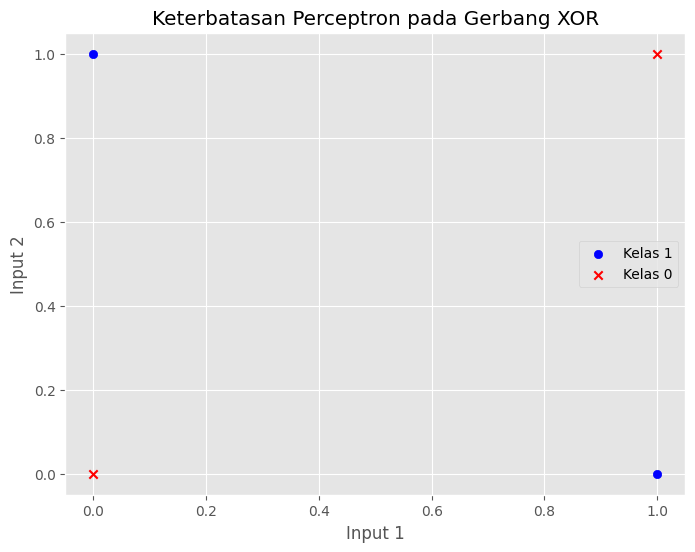

In [6]:
# Sel 3: Verifikasi dan visualisasi hasil
# Cetak hasil akhir
print("\n--- Hasil Akhir ---")
print(f"Bobot akhir: {p_xor.weights}")
print(f"Bias akhir: {p_xor.bias}")
print("\nVerifikasi hasil prediksi:")
for input_data, true_output in zip(X_xor, y_xor):
    # Menggunakan np.array([input_data]) untuk memastikan dimensi yang benar.
    prediction = p_xor.predict(np.array([input_data]))
    print(f"Input: {input_data}, Seharusnya: {true_output}, Prediksi: {prediction[0]}")

# Plot data dan "batas" yang tidak bisa memisahkan
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

# Plot data poin
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], color='blue', marker='o', label='Kelas 1')
# Memplot titik-titik (0, 1) dan (1, 0).
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], color='red', marker='x', label='Kelas 0')
# Memplot titik-titik (0, 0) dan (1, 1).
# Secara visual, Anda tidak bisa menggambar satu garis lurus untuk memisahkan kedua kelas ini.

# Hitung dan plot batas keputusan yang tidak konvergen
x_vals = np.linspace(-0.5, 1.5, 100)
# Menghasilkan 100 nilai x untuk plot garis.
if p_xor.weights[1] != 0:
    y_vals = (-p_xor.weights[0] * x_vals - p_xor.bias) / p_xor.weights[1]
    # Menghitung nilai y berdasarkan persamaan garis yang dibentuk oleh bobot dan bias.
    plt.plot(x_vals, y_vals, 'k--', label='Batas yang Tidak Dapat Memisahkan')
    # Memplot garis putus-putus. Garis ini akan terus berosilasi karena model tidak pernah konvergen.

plt.title('Keterbatasan Perceptron pada Gerbang XOR')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()

Visualisasi ini secara jelas menunjukkan mengapa Perceptron tidak dapat menyelesaikan masalah XOR. Model ini mencoba menggambar garis lurus untuk memisahkan titik-titik data, tetapi karena titik-titik tersebut tidak dapat dipisahkan secara linier, algoritma terus menyesuaikan bobotnya tanpa pernah menemukan solusi yang sempurna.